# Health Insurance and Vehicle Insurance Cross Sell Prediction
### Name: Sanaullah Pashtoon
\

---
## Introduction

Our client is an insurance company that is based in India (they will be using Rupees as currency) need help in building a model to predict whether the policyholders (customers) from past year will also be interested in vehicle insurance provided by the company.

We have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel).

---

## Exploratory Data Analysis

In this section we will be looking for patterns in our data. We will use Pandas and Seaborn to not only organize our data and look at it in a tabular frame but also to visualize it.






In [ ]:
# Importing Libraries and Datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


uploaded = files.upload()
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.head()

Saving test.csv to test.csv
Saving train.csv to train.csv


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# To make it easier to understand we will create two labels for the two types of data catagorical and quantitative
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

print(train[numerical_columns].describe())
print("\n")
print(train.Response.value_counts())

                 Age    Region_Code  Annual_Premium        Vintage
count  381109.000000  381109.000000   381109.000000  381109.000000
mean       38.822584      26.388807    30564.389581     154.347397
std        15.511611      13.229888    17213.155057      83.671304
min        20.000000       0.000000     2630.000000      10.000000
25%        25.000000      15.000000    24405.000000      82.000000
50%        36.000000      28.000000    31669.000000     154.000000
75%        49.000000      35.000000    39400.000000     227.000000
max        85.000000      52.000000   540165.000000     299.000000


0    334399
1     46710
Name: Response, dtype: int64


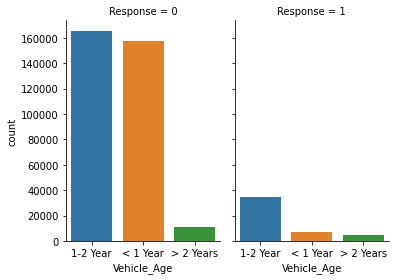

In [ ]:
# Now we will visual data that provides us with a lot of insight

#This is the relationship between vehicle age and if the client has insurance
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

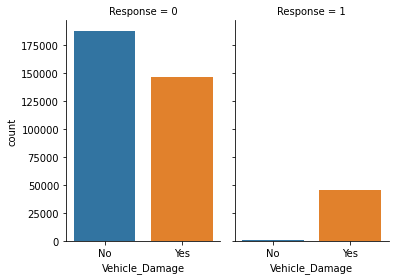

In [ ]:
# Relationship between vehicle damage and insurance
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

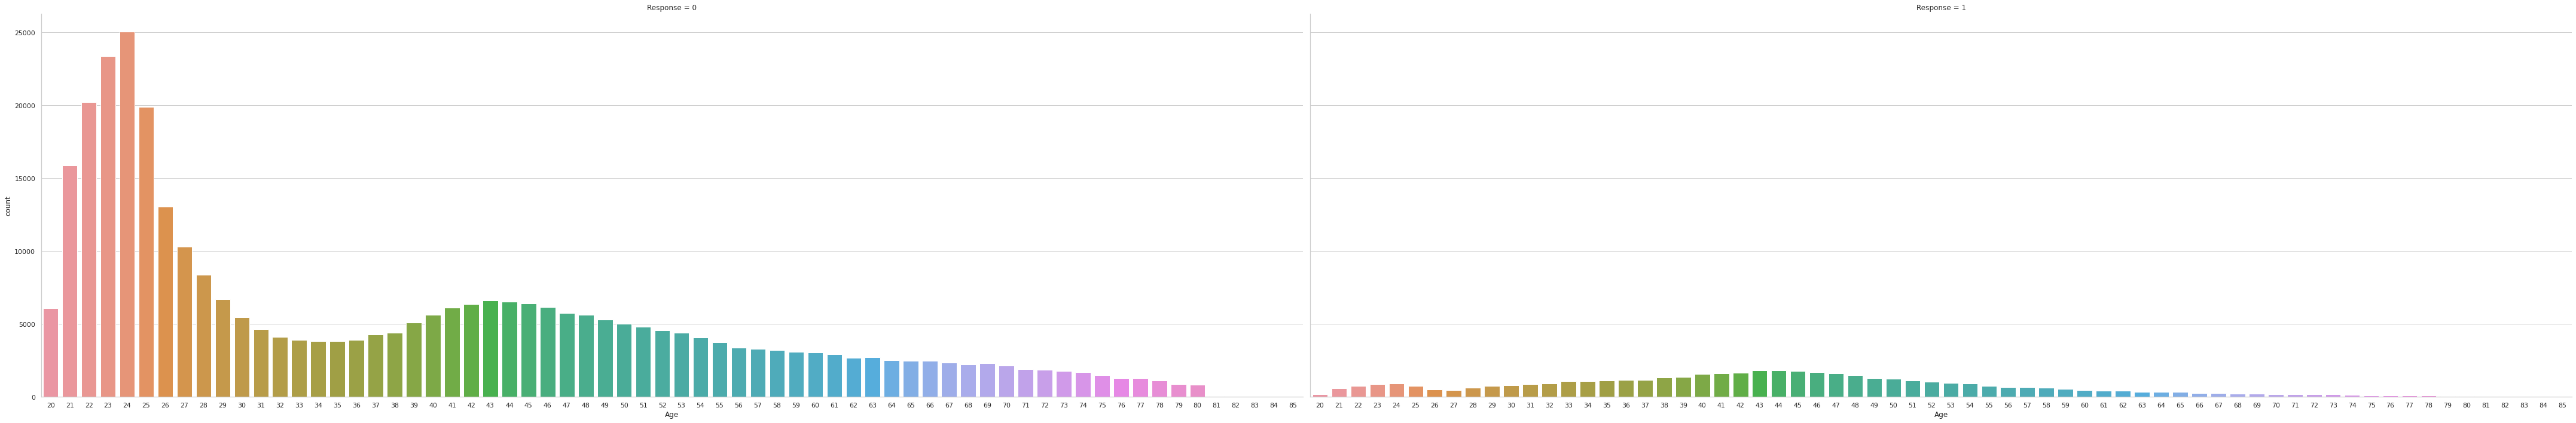

In [ ]:
#Relationship between Age and insurance
sns.set(style='whitegrid')
df=train.groupby(['Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Age", y="count",col="Response",
                data=df, kind="bar",
                height=10, aspect=3);

---
## Developing Models Using Unsupervised Learning

In this section we will be developing models that involve unsupervised learning
algorithims to better visualize our data.


In [ ]:
# We will modify our data to work better with catagorical data
train.loc[train['Gender'] == 'Male', 'Gender'] = 1
train.loc[train['Gender'] == 'Female', 'Gender'] = 0

train.loc[train['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
train.loc[train['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
train.loc[train['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

train.loc[train['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
train.loc[train['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

We will use the Kmeans model to better get a sense of how Age and Vehicle Age
effect the response.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


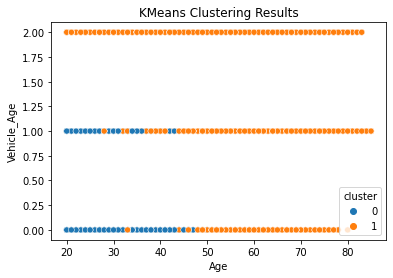

In [ ]:
#Importing Libraries
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
X = train.drop(['Response'], axis=1)
y = train['Response']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_std)

# Add cluster labels to the original dataframe
train['cluster'] = kmeans.labels_

# Plot the results
sns.scatterplot(x='Age', y='Vehicle_Age', hue='cluster', data=train)
plt.title('KMeans Clustering Results')
plt.show()

How the Kmeans method works is by partiting the data into K clusters, where K is the hyperparameter that is the number of clusters. The algorithm tries to minimize the sum of squared distances between the data points and their respective cluster centers.

The KMeans algorithm works as follows:

\
Choose the number of clusters K: $K$

Initialize K cluster centers: $C = {c_1, c_2, ..., c_K}$

Assign each data point $ x_i$ to the closest cluster center $c_j$, based on the Euclidean distance:
$$ argmin_j(||x_i - c_i||^2) $$

Recalculate the cluster centers as the mean of all the data points assigned to each cluster:
$$c_j = (1/|S_j|) * Σ_i∈S_j x_i$$

where $S_j$ is the set of data points assigned to cluster $j$.

Repeat until convergence.
The objective function of the KMeans algorithm can be defined as the sum of squared distances between each data point and its assigned cluster center:

$$J = Σ_i=1^n ||xi - cj||^2$$

where $n$ is the number of data points, $x_i$ is the ith data point, and $c_j$ is the center of the cluster to which $x_i$ is assigned.

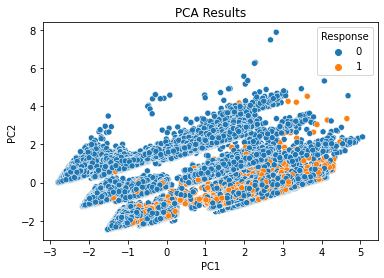

In [ ]:
#Importing Libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

X = train.drop(['Response'], axis=1)
y = train['Response']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Create a new dataframe with the principal components and response variable
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([principal_df, y], axis=1)

# Plot the results
sns.scatterplot(x='PC1', y='PC2', hue='Response', data=final_df)
plt.title('PCA Results')
plt.show()

---
##  Developing Predictive Models

In this section we will develop the following predictive models to let us
predict the outcome of the test dataset where we will determine whether or not the client will purchase insurance for their vehicle:
 \
 -Logistic Regression \
 -Decision Tree \
 -k-NN \

 ### Logistic Regression:

Using the logit function and random variables we will assume the following statement:
$$\text{logit}(P(Y=1)) = \log\left(\frac{P(Y=1)}{1-P(Y=1)}\right) = \beta_1 x +\beta_0$$
Another way of stating this statement is using the sigmoid function which is the inverse of the logit function:
$$P(Y=1)= \sigma(x;\beta) = \frac{1}{1+e^{-(\beta_1 x+\beta_0)}}$$

To train the model, we need to find the best $\beta$ that can explain the observed training data.

Given training data $(x_i,y_i)$, if our logistic regression assumption is true, then the probability to observe such data is the following:
$$\sigma(x_i;\beta)^{y_i} (1-\sigma(x_i;\beta))^{1-y_i} $$

In statistics parameter estimation Maximum Likelihood Estimation assumes the best parameter will maximize the likehood function.

$$\max_\beta \mathcal{P}(\beta)$$ is equivalent to
$$\min_\beta L(\beta) = - \frac{1}{N}\log L(\beta) = \frac{1}{N}\sum_{i=1}^{N} - y_i \log (\sigma(x_i;\beta))-(1-y_i)\log (1-\sigma(x_i;\beta)) $$

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = train.drop(['Response'], axis=1)
y = train['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an instance of the logistic regression class
logreg = LogisticRegression(n_jobs = -1)

# train the model using the training data
logreg.fit(X_train, y_train)

# predict the labels of a test dataset
y_pred = logreg.predict(X_test)

# calculate the accuracy of the predictions
acc = logreg.score(X_test, y_test)
print(acc)

0.8750623179659416


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# We only need 2 neighbors as the classifications are binary
knn_clf = KNeighborsClassifier(n_neighbors = 2)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test,y_test)


0.8644223452546509

In [ ]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

0.8224003568523524

We will change the hyperparamter that is tree depth so that we can get a better score.

In [ ]:
# set the max depth of the tree to 3
dt = tree.DecisionTreeClassifier(max_depth=6)

# fit the model to the training data
dt.fit(X_train, y_train)

# make predictions on the test data
dt.score(X_test,y_test)

0.8749311222481698

### Analyzing Predictive Methods

\

To see which model does a better job at predicting we look at the accuracy score for each model.

Using the logistic regression model we see that we have an accuracy score of 0.8750. I was expecting this score to be slightly higher. I believe that there are ways of increasing this score or at least the time it takes to run it if one were to adjust certain parts of the data. For instance removing the column called "Driver Licenses" as there would be no point in selling insurance to someone who doesn't even have a driver's license.

Using the kNN model we get an even lower score of 0.8644223. I don't think there's a way to improve this method as we need at least 2 K classes to make this work and 3 K classes does not make any sense.

Using the decision tree model we get two scores. When we have default parameters we get a score of 0.82240 but when we adjust our tree depth we get a score of 0.87493 which is approximately the same as the score we got for our logistic regression model.

The best predictive model would be the logistic regression model, but there are some parameters we should rework in order to get a score larger than 0.8750.

---
# Conclusion

For our conclusion we will be testing our predictive model with the best score on a test dataset.



In [ ]:
test.loc[test['Gender'] == 'Male', 'Gender'] = 1
test.loc[test['Gender'] == 'Female', 'Gender'] = 0

test.loc[test['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
test.loc[test['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
test.loc[test['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

test.loc[test['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
test.loc[test['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

X = test
predict = logreg.predict(X)
X.insert(0,"Response",predict)
X

,Response,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,381110,1,25,1,11.0,1,0,0,35786.0,152.0,53
1,0,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,0,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,0,381113,1,24,1,27.0,1,0,1,37356.0,152.0,187
4,0,381114,1,27,1,28.0,1,0,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...,...
127032,0,508142,0,26,1,37.0,1,0,0,30867.0,152.0,56
127033,0,508143,0,38,1,28.0,0,1,1,28700.0,122.0,165
127034,0,508144,1,21,1,46.0,1,0,0,29802.0,152.0,74
127035,0,508145,1,71,1,28.0,1,1,0,62875.0,26.0,265
